<a href="https://colab.research.google.com/github/Mangeshdeore/Sales-vs-Total-Spend-Prediction/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step - 1 : Business Problem Understanding**

*	What is the relationship between each advertising channel (TV,Radio,     Newspaper) and sales?

* Previous      we	lored Is there a relationshi   between total advertisin   s	nd and sales+. as well as predicting the total sales for some value of total spend.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Step-2.1 Data Collection**


In [ ]:
df=pd.read_csv('/content/Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df['Total spend']= df['TV'] + df['radio'] + df['newspaper']
df

,TV,radio,newspaper,sales,Total spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [ ]:
df.drop(columns=['TV','radio','newspaper'], axis=1, inplace=True)

**Step - 2.2 : Data Understanding**

This sample data displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

* TV: Advertising dollers spent on TV for a single product in a given market (in thousands of dollers).
* Radio: Advertisimg dollers spent on radio.
* Newspaper: Advertisimg dollers spent on newspaper.

**Target Variable**

Sales: sales of a single product in a given market (in thousands of windgets).


**Step 2.3- Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales        200 non-null    float64
 1   Total spend  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


**Step 3.1- Exploratory data analysis (EDA)**

On the basis of this data,how shoud you spend advertising money in the future? These general questions mightlead you to more specific questions:
1.	Is there a relationship between ads and sales?
2.	How strong is that relationship?
3.	Given ad spending, can sales be predicted?


In [ ]:
df.describe()

,sales,Total spend
count,200.000000,200.000000
mean,14.022500,200.860500
std,5.217457,92.985181
min,1.600000,11.700000
25%,10.375000,123.550000
50%,12.900000,207.350000
75%,17.400000,281.125000
max,27.000000,433.600000


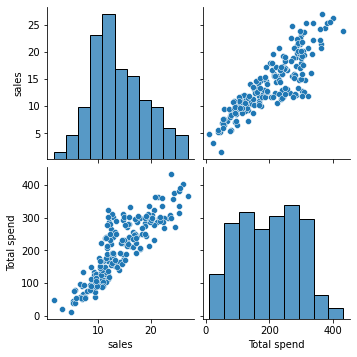

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.corr()

,sales,Total spend
sales,1.000000,0.867712
Total spend,0.867712,1.000000


**Step 3.2- Data Cleaning**

In [ ]:
df.isnull().sum()

sales          0
Total spend    0
dtype: int64

**Step 3.3- Data Wrangling**

0.04948799338306634

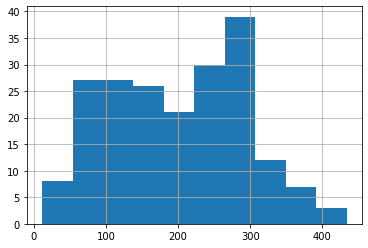

In [ ]:
df['Total spend'].hist()
df['Total spend'].skew()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


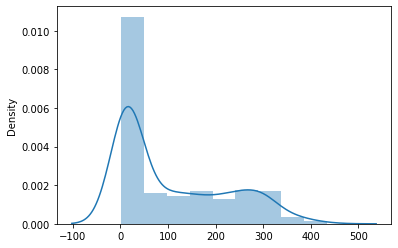

In [ ]:
sns.distplot(df)

-0.7298781705515832

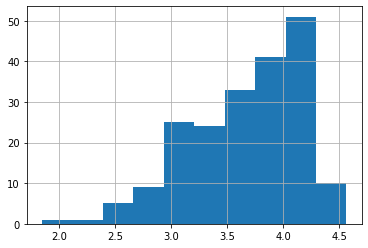

In [ ]:
df['sqr_Total spend']=df['Total spend']**(1/4)
df['sqr_Total spend'].hist()
df['sqr_Total spend'].skew()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


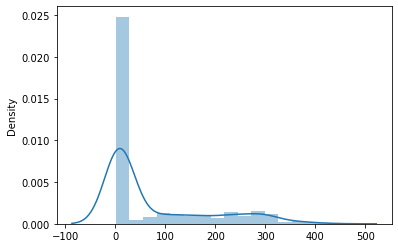

In [ ]:
sns.distplot(df)

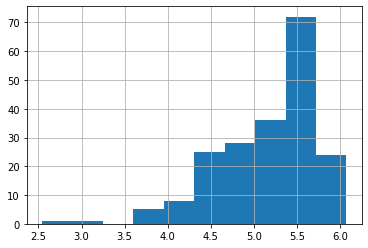

In [ ]:
df['Log_Total spend']=np.log(df['Total spend']+1)
df['Log_Total spend'].hist()


**3.4 Outliers**

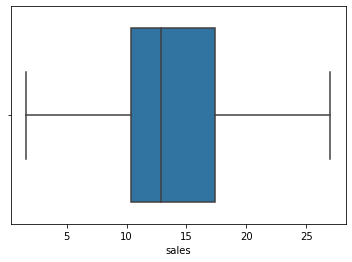

In [ ]:
sns.boxplot(x=df['sales'])

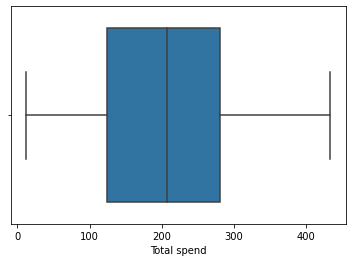

In [ ]:
sns.boxplot(x=df['Total spend'])

**Step 3.5- Train-Test Split**

In [ ]:
X=df.drop(columns='sales')
y=df['sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state = 0)

**Step-4 Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

4.432756449216088

In [ ]:
model.coef_

array([  0.09887668, -38.1017787 ,  25.09070969])

**Predictions**

In [ ]:
train_predictions=model.predict(X_train)
test_predictions=model.predict(X_test)

**Step-5 Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE for test data:',mean_absolute_error(y_test, test_predictions))
print('MAE for train data:',mean_absolute_error(y_train, train_predictions))

MAE for test data: 1.7446803540393958
MAE for train data: 2.0679139739822787
